In [3]:
from cinrad2nexrad import cinrad2nexrad
import os
import warnings

warnings.filterwarnings("ignore")

bz2Path = os.path.expanduser("~/Documents/cinrad/bz2/")
nFiles1 = bz2Path + "Z_RADR_I_Z9731_20230504102859_O_DOR_SAD_CAP_FMT.bin.bz2"
ar2vf = nFiles1 + ".ar2v"
cinrad2nexrad(nFiles1, ar2vf, "CSHN")

First radial num: 0 
Last radial num: 5463
All info & data in dict: "info" and "rec"

Number of rays: 5464
Number of sweeps: 16
rec-data-len: 5464


In [4]:
import singledop
from matplotlib import cm
import pyart
from matplotlib import pyplot as plt

sradar1 = pyart.io.read_nexrad_archive(ar2vf)
wind = singledop.SingleDoppler2D(
    radar=sradar1,
    grid_spacing=0.25,
    L=10,
    sweep_number=1,
    name_vr="velocity",
    thin_factor=[4, 4],
    # grid_edge=120,
    # sigma=1,
)

7396 total observations (M)


(-100.0, 100.0)

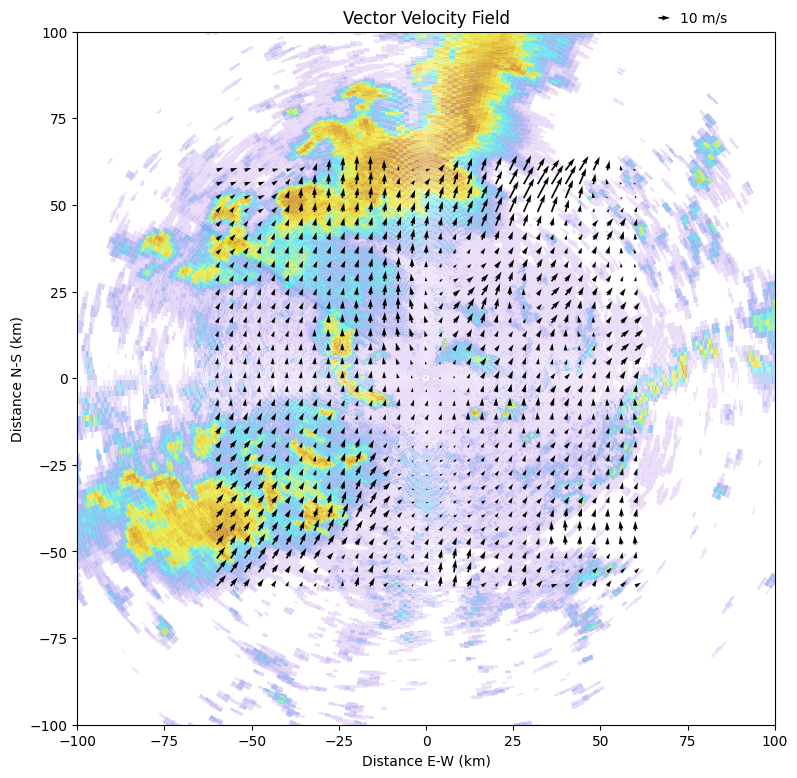

In [7]:
swdisplay = singledop.AnalysisDisplay(wind)
fig, ax = plt.subplots(figsize=(9, 9))
dz_cmap = cm.get_cmap("pyart_LangRainbow12")
display = pyart.graph.RadarDisplay(sradar1)
display.plot_ppi(
    "reflectivity",
    sweep=0,
    vmin=0,
    vmax=70,
    cmap=dz_cmap,
    colorbar_flag=False,
    axislabels=["Distance E-W (km)", "Distance N-S (km)"],
    alpha=0.5,
)
swdisplay.plot_velocity_vectors(ax=ax, legend=10)
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])